In [2]:
import tensorflow as tf
import os
import numpy as np

In [3]:
base_dir=r"/kaggle/input/coin-dataset-with-separated/Coin_dataset_divided"

In [5]:
IMAGE_SIZE=224
BATCH_SIZE=32

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1/255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    
    validation_split=0.1
)

In [6]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
) 

Found 9232 images belonging to 3 classes.
Found 1025 images belonging to 3 classes.


In [8]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [9]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

58889256/58889256 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [10]:
for layer in vgg.layers:
    layer.trainable=False

In [11]:
folders=glob(r"/kaggle/input/coin-dataset-with-separated/Coin_dataset_divided/*")
print(len(folders))

3


In [12]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epoch=20
history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/20
289/289 [==============================] - 317s 1s/step - loss: 0.0546 - accuracy: 0.9766 - val_loss: 9.9124 - val_accuracy: 0.9707
Epoch 2/20
289/289 [==============================] - 237s 820ms/step - loss: 0.0051 - accuracy: 0.9999 - val_loss: 25.5211 - val_accuracy: 0.9971
Epoch 3/20
289/289 [==============================] - 232s 802ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 52.4379 - val_accuracy: 0.9971
Epoch 4/20
289/289 [==============================] - 231s 800ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 24.0161 - val_accuracy: 0.9971
Epoch 5/20
289/289 [==============================] - 234s 808ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 7.6086 - val_accuracy: 0.9980
Epoch 6/20
289/289 [==============================] - 232s 804ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 20.9055 - val_accuracy: 0.9990
Epoch 7/20
289/289 [==============================] - 234s 809ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 21.5316

In [15]:
# Save the trained model
model.save('VGG16_coins.h5')

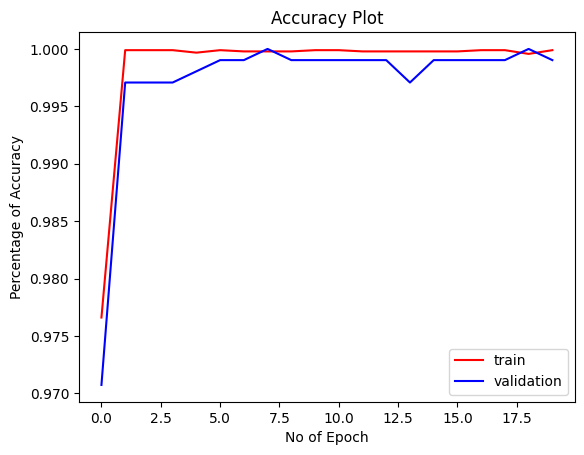

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('No of Epoch')
plt.ylabel('Percentage of Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

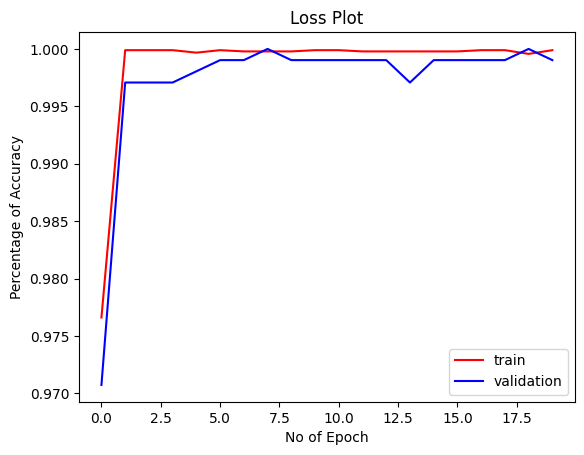

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('No of Epoch')
plt.ylabel('Percentage of Accuracy')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Set the parameters for the data generators
batch_size = 32
img_height, img_width = 224, 224

# Define the class names
class_names = ["1tk", "2tk", "5tk"]

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\User\Desktop\Thesis\Work\VGG16_coins.h5")

# Create the Tkinter GUI
root = tk.Tk()
root.title("Bangladeshi Currency Classification")
root.geometry("1000x1000")
root.configure(bg="yellow")  # Set the window background color

# Function to classify selected images
def classify_images():
    clear_displayed_images()  # Clear the previously displayed images and labels
    file_paths = filedialog.askopenfilenames()

    if file_paths:
        total_currency_value = 0

        for file_path in file_paths:
            # Load and preprocess the image
            image = Image.open(file_path)
            image = image.resize((img_width, img_height))
            image = image.convert("RGB")
            image_array = np.array(image) / 255.0
            image_array = np.expand_dims(image_array, axis=0)

            # Make a prediction
            prediction = model.predict(image_array)
            predicted_class_index = np.argmax(prediction)
            predicted_class = class_names[predicted_class_index]

            # Calculate the currency value and add it to the total
            currency_value = int(predicted_class.replace('tk', ''))
            total_currency_value += currency_value

            # Display the image and predicted currency in a new row
            display_image(image, predicted_class)

        # Display the total currency value
        total_label = tk.Label(root, text=f"Total Currency is: {total_currency_value} tk", font=("Arial", 12))
        total_label.pack(pady=10)
    else:
        result_label.config(text="No images selected.")

def clear_displayed_images():
    for widget in image_frame.winfo_children():
        widget.destroy()

    # Clear the total currency label
    for widget in root.winfo_children():
        if widget.winfo_class() == "Label" and widget["text"].startswith("Total Currency"):
            widget.destroy()

def display_image(image, predicted_class):
    image = ImageTk.PhotoImage(image)
    image_label = tk.Label(image_frame, image=image)
    image_label.image = image
    image_label.pack(pady=10)
    label = tk.Label(image_frame, text=f"Predicted currency: {predicted_class}", font=("Arial", 12))
    label.pack(pady=10)

# Create GUI components
select_button = tk.Button(root, text="Select Images", command=classify_images, bg="hotpink", fg="white")
select_button.pack(pady=10)

clear_button = tk.Button(root, text="Clear", command=clear_displayed_images, bg="red", fg="white")
clear_button.pack(pady=10)

image_frame = tk.Frame(root)
image_frame.pack()

result_label = tk.Label(root, font=("Arial", 12), wraplength=1500)
result_label.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1/1 [==============================] - 0s 193ms/step
